In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import collections

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

<Figure size 1280x960 with 0 Axes>

In [2]:
def overview(df, file_name):
    # Shape of data: No. of rows and columns
    no_rows, no_cols = df.shape

    # Check for missing values
    null_values = df.isnull().sum().sum()

    # No. of duplicates values
    duplicates = df[df.duplicated()].shape[0]
    df.drop_duplicates(inplace=True)


    # Diagnostics results
    data_check = """
    - The dataset {0} has {1} rows and {2} columns
    - There are {3} null/na values and {4} duplicate rows which were removed. 
    """ 

    print(data_check.format(file_name, no_rows, no_cols,
                            null_values, duplicates))
    
    
#     print("All duplicated rows were removed")
    
def loading_datasets(file_names = ['household_pre_survey_clean.csv', 
                                  'household_post_survey_clean.csv',
                                  'commercial_post_survey_clean.csv']):
    # Loading the datasets
    datasets = []
    for name in file_names:
        data = pd.read_csv('datasets_clean/' + name)
        # Remove those with no renewvia_id
        data.dropna(subset=['renewvia_id'], inplace=True)
        if 'Unnamed: 0' in data.columns:
            data.drop('Unnamed: 0', axis=1, inplace=True)

        overview(data, name)
        datasets.append(data)
        
    return datasets

In [3]:
surveys = loading_datasets()


    - The dataset household_pre_survey_clean.csv has 1562 rows and 30 columns
    - There are 7199 null/na values and 4 duplicate rows which were removed. 
    

    - The dataset household_post_survey_clean.csv has 2602 rows and 40 columns
    - There are 14045 null/na values and 12 duplicate rows which were removed. 
    

    - The dataset commercial_post_survey_clean.csv has 470 rows and 34 columns
    - There are 2835 null/na values and 2 duplicate rows which were removed. 
    


In [4]:
# Nominal: Freq dist, Mode
# Ordinal: Freq dist, The mode and/or the median, the range
# Interval: Freq dist, The mode, median,and mean, Range, std, and variance 
# Ratio: Freq dist, The mode, median,and mean, Range, std, and variance 

# Gender Equality
From the household (pre and post) and commercial (post) surveys, we extract some descriptive statistics and conduct further analyses with the encoded data in Julia.

1. School Attendance per gender
2. Employment (Jobs/Business) per Gender

In [5]:
hs_post = surveys[1]
hs_post.head()

,renewvia_id,interviewed_before,occupation_change,houlsehold_income_change,avg_monthly_household_income,female_schooling_change,male_schooling_change,school_performance_change,household_business_owners,business_recent,...,water_collection_travel_distance,water_collection_time,water_monthly_cost,clinic_travel_distance,clinic_electricity_access_minigrid,clinic_refrigeration_access,better_access_health_minigrid,minigrid_access_life_improvement,business_owners_count,business_owners_female
1,521168.0,no,no,yes_it_has_decreased,20000.0,no_its_the_same,no_its_the_same,yes_its_gotten_better,NaN,NaN,...,no_need_to_travel_at_home_water_supply,less_than_1_hour,i_dont_pay_its_free,between_2_3_km,no,no,yes,no_its_the_same,0,0
2,521039.0,yes,yes,yes_it_has_increased,50000.0,yes_its_increased,yes_its_increased,yes_its_gotten_better,adult_male,yes,...,no_need_to_travel_at_home_water_supply,less_than_1_hour,i_dont_pay_its_free,between_2_3_km,no,no,yes,yes,1,0
3,521055.0,no,no,no_it_is_the_same,40000.0,no_its_the_same,no_its_the_same,no_its_the_same,NaN,NaN,...,no_need_to_travel_at_home_water_supply,less_than_1_hour,i_dont_pay_its_free,between_2_3_km,no,no,yes,yes,0,0
4,521090.0,no,no,yes_it_has_increased,20000.0,no_its_the_same,no_its_the_same,yes_its_gotten_better,adult_female,yes,...,no_need_to_travel_at_home_water_supply,less_than_1_hour,i_dont_pay_its_free,between_2_5_km,yes,yes,yes,yes,1,1
5,521091.0,no,no,no_it_is_the_same,30000.0,no_its_the_same,no_its_the_same,yes_its_gotten_better,adult_male,no,...,no_need_to_travel_at_home_water_supply,3_4_hours,i_dont_pay_its_free,between_2_5_km,yes,yes,yes,yes,1,0


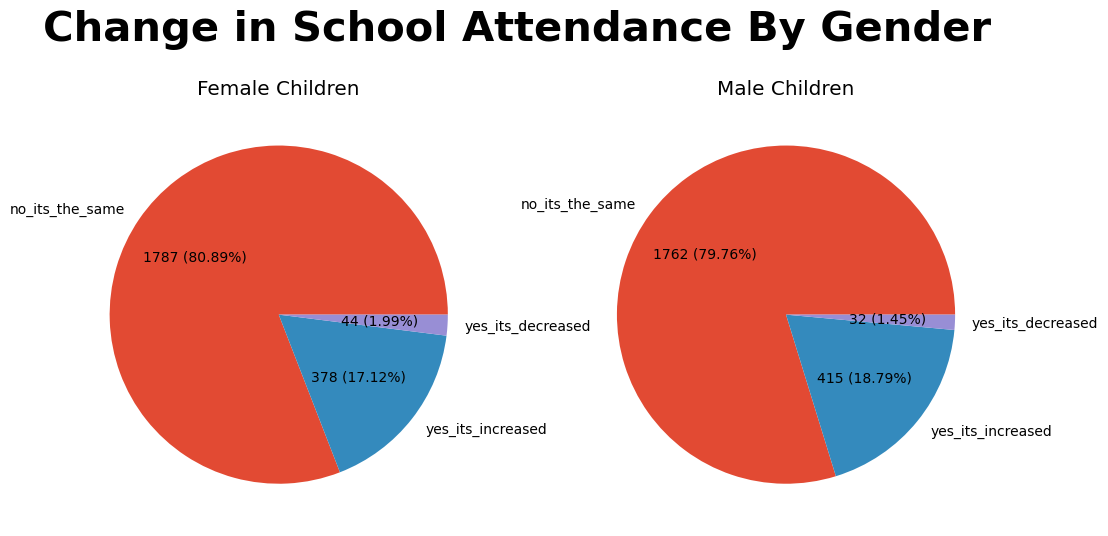

In [40]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}%)'.format(p=pct,v=val)
    return my_autopct

# Has there been a change in the number of females in your household 
# who attend school full time since connection to minigrid power?

# Has there been a change in the number of males in your household 
# who attend school FULL TIME since connection to minigrid power?

cols = ['female_schooling_change', 'male_schooling_change']
var_freq = {}
for col in cols:
    labels = hs_post[col].value_counts(dropna=True).index
    vals = hs_post[col].value_counts(dropna=True).values
    var_freq[col] = [vals, labels]

# # Proportions by seat type
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))
fig.suptitle("Change in School Attendance Per Gender", 
             y=0.8, fontsize=30, fontweight='bold'
            )
ax1.pie(var_freq[cols[0]][0], labels=var_freq[cols[0]][1], autopct=make_autopct(vals))
ax1.set_title('Female Children')
ax2.pie(var_freq[cols[1]][0], labels=var_freq[cols[1]][1], autopct=make_autopct(vals))
ax2.set_title("Male Children")
plt.show()

In [ ]:
# If you answered yes to adding new workers, how many new employees are female?
# Are any household members business owners?

In [6]:
# # Isolate columns present in both pre and post survey for paired testing
# pre_cols = list(hs_pre.columns)
# post_cols = list(hs_post.columns)
# result = collections.Counter(pre_cols) & collections.Counter(post_cols)
# print(list(result.elements()))

# # # Filter the datasets accordingly
# # df_pre = hs_pre[list(result.elements())]
# # df_post = hs_post[list(result.elements())]

In [7]:
# print(df_post['household_business_owners'].describe())
# df_post['household_business_owners'].value_counts(normalize=True)

# # Unique value counts for categorical columns
# for col in df.columns[2:]:
#     print(col)
#     col_cats_count = df[col].value_counts(sort=True)
#     n_cat = len(col_cats_count.keys())
#     freq = dict(col_cats_count)
#     if n_cat <= 10:
#         print(n_cat)
#         print(freq)
#     else:
#         print(n_cat)

In [8]:
# # Merging the dataset on 'renewvia_id'
# df_pre.merge(df_post, on='renewvia_id', how='inner', suffixes=('_pre', '_post'))